In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [116]:
np.random.seed(42)

In [117]:
df = pd.read_csv("titanic.csv")

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Removendo identificadores de passageiros

Nós não queremos dados que identifiquem passageiros ou gerem algum bias nos models, então decidimos remover o identificador do passageiro, o nome e o ticket.

In [119]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [120]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Checando valores nulos e impróprios

In [121]:
df.shape

(891, 8)

In [122]:
print(df["Survived"].describe()) # Variavel categorica
print(df["Survived"].isna().any())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
False


In [123]:
print(df["Pclass"].describe())  # Variavel categorica
print(df["Pclass"].isna().any())

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
False


In [151]:
print(df["Age"].describe())  # Variavel categorica
print(df["Age"].isna().any())

count    711.000000
mean      29.675345
std       14.552495
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
True


In [152]:
# Como detectamos que a variavel Age tem valores nulos, vamos preencher esses valores com a media de idade
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [124]:
print(df["Sex"].describe())  # Variavel categorica
print(df["Sex"].isna().any())

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
False


In [125]:
print(df["SibSp"].describe())
print(df["SibSp"].isna().any())

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
False


In [126]:
print(df["Parch"].describe())
print(df["Parch"].isna().any())

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
False


In [127]:
print(df["Fare"].describe()) # Variavel do espaço continuo numérico e não categórica
print(df["Fare"].isna().any())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
False


### Vamos analisar a coluna Fare (Taxa) de forma mais profunda

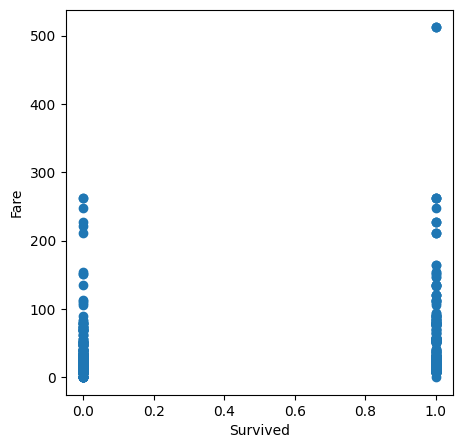

In [128]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Survived'], df['Fare'])
ax.set_xlabel('Survived')
ax.set_ylabel('Fare')
plt.show()

In [129]:
# Vamos tirar os outliers
fare_outliers = df[df['Fare'] > 500]
df = df[df['Fare'] < 500]

In [130]:
# Será que temos alguns valores zerados?
df[df['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,NaN,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,NaN,0,0,0.0,S
466,0,2,male,NaN,0,0,0.0,S
481,0,2,male,NaN,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,NaN,0,0,0.0,S


In [131]:
# Vamos utilizar a média para preencher os valores zerados
df['Fare'] = df['Fare'].replace(0, df['Fare'].mean())

In [132]:
# Voltando a análise original, vamos olhar a ultima variável que podemos utilizar
print(df["Embarked"].describe())  # Variavel categorica
print(df["Embarked"].isna().any())

count     886
unique      3
top         S
freq      644
Name: Embarked, dtype: object
True


In [133]:
# Detectamos valores nulos em Embarked, vamos preencher com o valor mais comum
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [134]:
# Transformando variaveis categoricas para numeros que representam as categorias

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category").cat.codes

In [135]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Correlação das variáveis com a sobrevivencia do passageiro

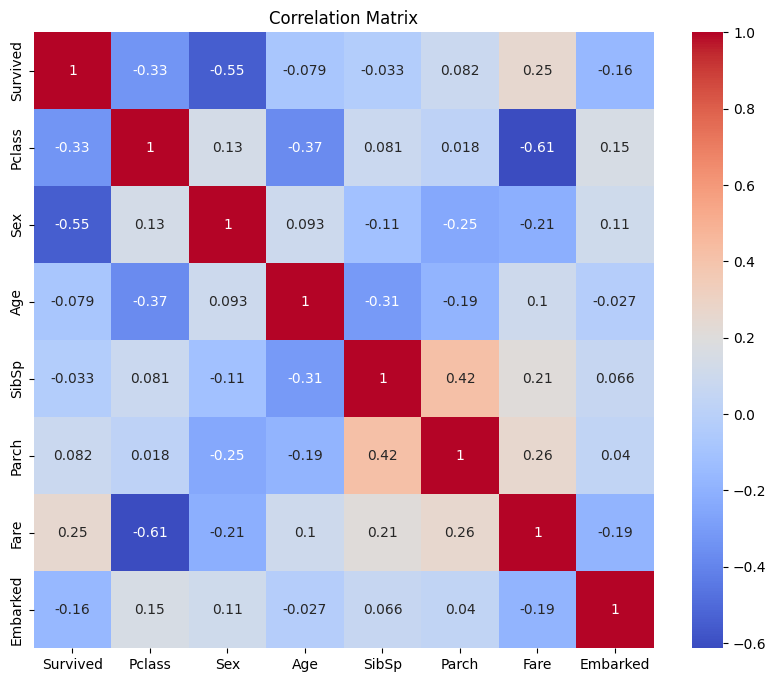

In [136]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [142]:
# Splitting the data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']

# Separamos os dados entre treino e teste para podermos ter uma ideia de como o modelo se comporta
# Além de usarmos stratify para garantir que a distribuição das classes seja a mesma entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [138]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [139]:
# Vamos calcular a acurácia com nossos dados de teste
model.score(X_test, y_test)

0.8314606741573034

In [141]:
# Já para o caso de outliers removidos, a acurácia que temos é de 33%.
for col in df.columns:
    if fare_outliers[col].dtype == "object":
        fare_outliers[col] = fare_outliers[col].astype("category").cat.codes

model.score(fare_outliers[[col for col in df.columns if col != 'Survived']], fare_outliers['Survived'])

0.3333333333333333